# Model Trainer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Importing The Data From CSV File To DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

### Showing top 5 rows

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Feature Engineering

In [4]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3

In [5]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### Splitting Data into Dependent and Inpdependent Features

In [6]:
X = df.drop(['total_score'], axis=1)

In [7]:
y = df['total_score']

In [8]:
X.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667


In [9]:
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

### Applying Transformation In Data Via ColumnTransformer
- OneHotEncoding --> categorical
- Scaling --> numerical 

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns

scaler = StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('num_scaling', scaler, num_features),
    ('cat_ohe', ohe, cat_features)
], remainder='passthrough')

### Splitting our Data into Training and Testing sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Transformation to our Training and Testing data

In [12]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
print(f'Shape of training data: {X_train.shape}')
print(f'Shape of testing data: {X_test.shape}')

Shape of training data: (800, 21)
Shape of testing data: (200, 21)


In [14]:
def evaluate(actual, pred):
    mse = mean_squared_error(actual, pred)
    mae = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    r2 = r2_score(actual, pred)

    return mse, mae, rmse, r2

In [15]:
# Assigning Multiple Models
models = {
    'linear regression' : LinearRegression(),
    'lasso' : Lasso(),
    'ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Support Vector Regressor' : SVR(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Ada Boost Regressor' : AdaBoostRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor(),
    'XGBoost Regressor' : XGBRegressor()

}

models_score = {}

for model_name, model in models.items():
    model = model  
    model.fit(X_train, y_train)  #Training Models

    # Taking Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Training Evaluation Metrics
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate(y_train, y_pred_train)

    # Testing Evaluation Metrics
    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate(y_test, y_pred_test)

    print('Model Name: ', model_name)

    print('Model Performance On Training Set')
    print(f'- Root Mean Squarred Error: {model_train_rmse}')
    print(f'- Mean Squarred Error: {model_train_mse}')
    print(f'- Mean Absolute Error: {model_train_mae}')
    print(f'- R2 Score: {model_train_r2}')

    print('-' * 50)

    print('Model Performance On Testing Set')
    print(f'- Root Mean Squarred Error: {model_test_rmse}')
    print(f'- Mean Squarred Error: {model_test_mse}')
    print(f'- Mean Absolute Error: {model_test_mae}')
    print(f'- R2 Score: {model_test_r2}')

    models_score[model_name] = model_test_r2 

    print('=' * 50)
    print('\n')   

Model Name:  linear regression
Model Performance On Training Set
- Root Mean Squarred Error: 8.702335715267317e-16
- Mean Squarred Error: 7.573064690121713e-31
- Mean Absolute Error: 5.329070518200751e-17
- R2 Score: 1.0
--------------------------------------------------
Model Performance On Testing Set
- Root Mean Squarred Error: 2.2469334198890887e-15
- Mean Squarred Error: 5.048709793414476e-30
- Mean Absolute Error: 2.1316282072803005e-16
- R2 Score: 1.0


Model Name:  lasso
Model Performance On Training Set
- Root Mean Squarred Error: 0.999999999999993
- Mean Squarred Error: 0.9999999999999861
- Mean Absolute Error: 0.8002753770375242
- R2 Score: 0.999442910884498
--------------------------------------------------
Model Performance On Testing Set
- Root Mean Squarred Error: 1.0462774991755375
- Mean Squarred Error: 1.0946966052810168
- Mean Absolute Error: 0.8237354633452219
- R2 Score: 0.9994325936267315


Model Name:  ridge
Model Performance On Training Set
- Root Mean Squarred 

### Finding The Best Model Based On R2 Score

In [16]:
models_score

{'linear regression': 1.0,
 'lasso': 0.9994325936267315,
 'ridge': 0.9999998116263037,
 'K-Neighbors Regressor': 0.9668417406093228,
 'Support Vector Regressor': 0.7692333368591924,
 'Decision Tree': 0.9975612905225529,
 'Random Forest Regressor': 0.9961496016869547,
 'Ada Boost Regressor': 0.9907318175272452,
 'Cat Boost Regressor': 0.9948926720466135,
 'XGBoost Regressor': 0.9973678729712103}

In [17]:
pd.DataFrame({
    'Models' : models_score.keys(),
    'R2Score' : models_score.values()
})

,Models,R2Score
0,linear regression,1.000000
1,lasso,0.999433
2,ridge,1.000000
3,K-Neighbors Regressor,0.966842
4,Support Vector Regressor,0.769233
5,Decision Tree,0.997561
6,Random Forest Regressor,0.996150
7,Ada Boost Regressor,0.990732
8,Cat Boost Regressor,0.994893
9,XGBoost Regressor,0.997368


Selected the best model Linear Regression

### Training On Best Model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'Score: {score}')

Score: 1.0


### Plot Y_Pred and Y_Test

Text(0, 0.5, 'Predicted')

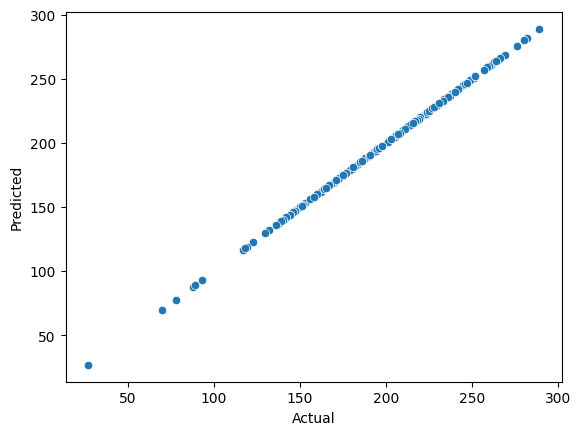

In [19]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [20]:
pred_df = pd.DataFrame({
    'Actual' : y_test,
    'pred' : y_pred,
    'Difference' : y_test - y_pred
})

In [21]:
pred_df

,Actual,pred,Difference
521,261,261.0,0.0
737,192,192.0,0.0
740,225,225.0,0.0
660,224,224.0,0.0
411,245,245.0,0.0
...,...,...,...
408,165,165.0,0.0
332,171,171.0,0.0
208,231,231.0,0.0
613,216,216.0,0.0
